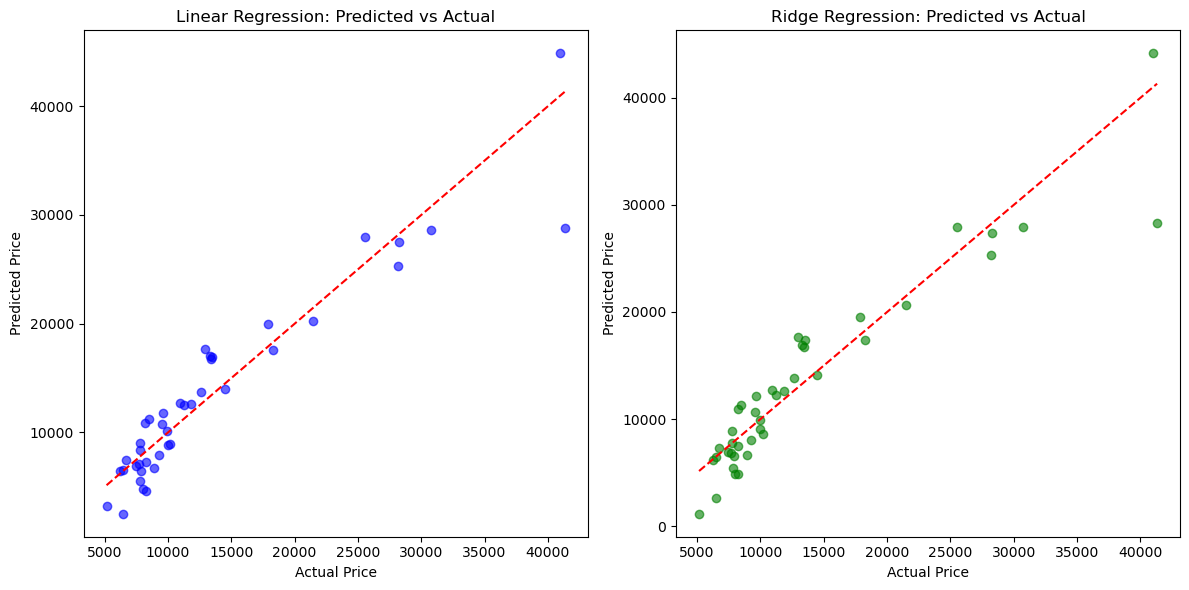

                  Feature  Linear Regression Coefficient  \
0               symboling                   1.206925e+02   
1               wheelbase                   6.436797e+02   
2               carlength                  -9.896359e+02   
3                carwidth                   1.209908e+03   
4               carheight                   2.750156e+02   
5              curbweight                   1.925829e+03   
6              enginesize                   4.998792e+03   
7               boreratio                  -5.667758e+02   
8                  stroke                  -1.228048e+03   
9        compressionratio                  -1.050933e+03   
10             horsepower                   7.060068e+01   
11                peakrpm                   9.718378e+02   
12                citympg                  -1.451442e+03   
13             highwaympg                   1.245482e+03   
14           fueltype_gas                  -7.345397e+02   
15       aspiration_turbo               

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

df = pd.read_csv('D:/CarPrice_Assignment.csv')
df = df.drop(columns=['car_ID', 'CarName'])
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.title('Ridge Regression: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression Coefficient': linear_model.coef_,
    'Ridge Regression Coefficient': ridge_model.coef_
})

print(coefficients)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
